In [1]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
# define the X and y
X = data.drop(['target', 'label'], axis=1)
y = data.loc[:, 'label']
print(X.shape)

(150, 4)


In [5]:
# establish the descision tree model
from sklearn import tree
# 创建一个决策树，到了 5 个样本的时候就停止决策（即继续分支判断下去）
dc_tree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
dc_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

In [7]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_predict = dc_tree.predict(X)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.9733333333333334


[Text(0.4444444444444444, 0.9, 'PetalWidth <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.7, 'PetalWidth <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'PetalLength <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.2222222222222222, 0.3, 'SepalLength <= 5.15\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = versicolor'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = versicolor'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.7777777777777778, 0.5, 'PetalLength <= 4.95\nentropy = 0.151\nsamples = 46\nvalue = [

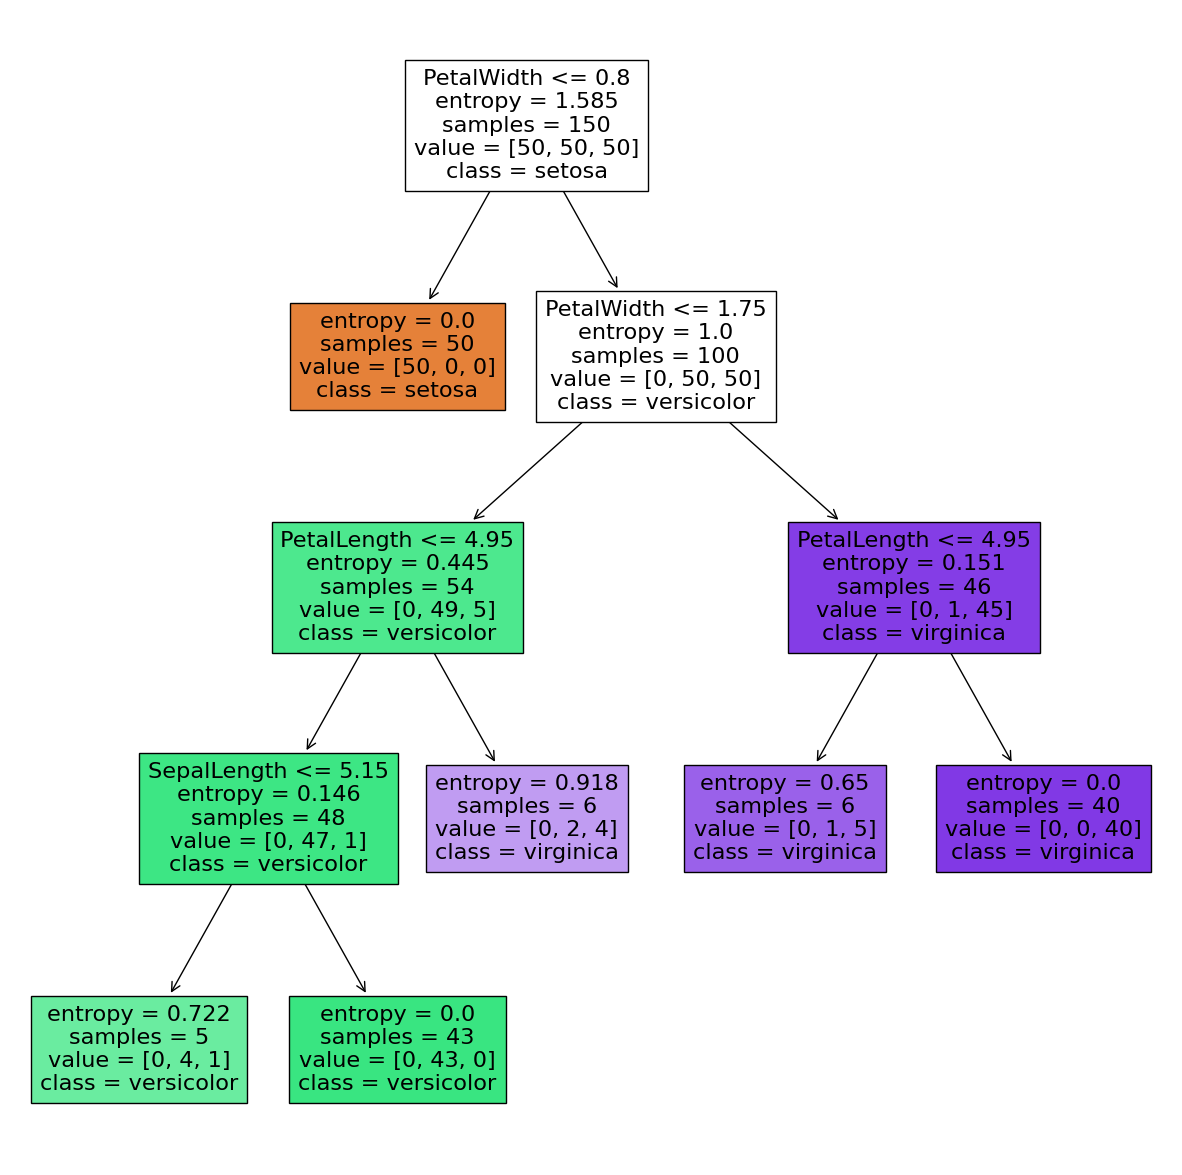

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dc_tree, filled='True', 
               feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
               class_names=['setosa', 'versicolor', 'virginica'])